In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('data.csv',header=0)


In [8]:
data

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
data[0]

KeyError: 0

In [4]:
data.columns

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay

import mlflow

import mlflow.sklearn

In [5]:
y=data.loc[:,'diagnosis']
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [6]:
#X=data.loc[:, data.columns !='diagnosis']
X =data.loc[:, ~data.columns.isin(['diagnosis','id'])]
X

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
from sklearn.model_selection import train_test_split,KFold


X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [8]:
X_test

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [9]:
model = LogisticRegression(solver='liblinear', random_state=0)


In [10]:
def train(model,x_train,y_train):
    model = model.fit(x_train,y_train)

    train_acc=model.score(x_train,y_train)

    mlflow.log_metric('train_acc',train_acc)
    print(f'Train Accuracy: {train_acc:0.2%}')

def evaluate(model, x_test,y_test):
    eval_acc = model.score(x_test, y_test)
    preds = model.predict(x_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    mlflow.log_metric("eval_acc", eval_acc)
    mlflow.log_metric("auc_score", auc_score)
    print(f"Auc Score: {auc_score:.3%}")
    print(f"Eval Accuracy: {eval_acc:.3%}")
    cm=confusion_matrix(y_test, model.predict(X_test))
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Bs', 'Predicted Ms'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Bs', 'Actual Ms'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='gray')
    plt.savefig("sklearn_conf_matrix.png")
    mlflow.log_artifact("sklearn_conf_matrix.png")

In [11]:
model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [12]:
model.classes_

array(['B', 'M'], dtype=object)

In [13]:
model.predict_proba(X_test)

array([[8.35082100e-01, 1.64917900e-01],
       [1.58827951e-09, 9.99999998e-01],
       [1.54450648e-03, 9.98455494e-01],
       [9.97196010e-01, 2.80399015e-03],
       [9.99454973e-01, 5.45026584e-04],
       [2.50351295e-10, 1.00000000e+00],
       [4.59632332e-13, 1.00000000e+00],
       [9.66383089e-03, 9.90336169e-01],
       [9.97351140e-01, 2.64885964e-03],
       [9.88282263e-01, 1.17177369e-02],
       [9.38470887e-01, 6.15291135e-02],
       [4.84103832e-04, 9.99515896e-01],
       [9.90100933e-01, 9.89906664e-03],
       [2.44542508e-01, 7.55457492e-01],
       [9.97783257e-01, 2.21674327e-03],
       [1.10141454e-03, 9.98898585e-01],
       [9.97524341e-01, 2.47565884e-03],
       [9.99732018e-01, 2.67981717e-04],
       [9.98290220e-01, 1.70977972e-03],
       [3.94186868e-08, 9.99999961e-01],
       [8.62488175e-01, 1.37511825e-01],
       [9.87875648e-01, 1.21243520e-02],
       [1.42343026e-10, 1.00000000e+00],
       [9.94527858e-01, 5.47214168e-03],
       [9.880857

In [14]:
model.predict(X_test)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

In [15]:
model.score(X_test, y_test)

0.956140350877193

In [16]:
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc_score

0.9977071732721913

In [17]:
cm=confusion_matrix(y_test, model.predict(X_test))
cm

array([[70,  1],
       [ 4, 39]], dtype=int64)

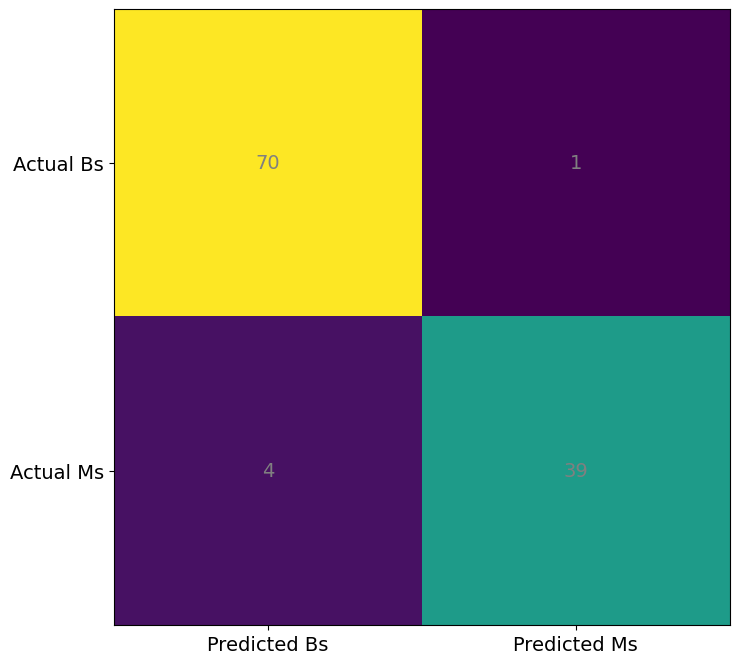

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Bs', 'Predicted Ms'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Bs', 'Actual Ms'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='gray')
plt.show()

In [ ]:
model = LogisticRegression(random_state=None,max_iter=400, solver='newton-cg')
mlflow.set_experiment("scikit_learn_experiment")
with mlflow.start_run():
    train(model, X_train, y_train)
    evaluate(model, X_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

In [23]:
anomaly_weights = [1,5,10,15]
num_folds = 5
kfold= KFold(n_splits=num_folds,shuffle=True,random_state=42)

In [ ]:
for train,test in kfold.split(X,y):
    print('-----------------------------------')
    print(X.loc[test, :])
    print('-------------------------------------')
   


In [22]:
mlflow.set_experiment('sklearn_breats_cancer_tuning_3')
logs = []
for f in range(len(anomaly_weights)):
    fold = 1
    accuracies = []
    auc_scores = []
    for train,test in kfold.split(X,y):
        with mlflow.start_run():
            weight = anomaly_weights[f]
            #mlflow.log_param("anomaly_weight", weight)
            class_weights= {
                'B': 1,
                'M': weight
            }
            sk_model = LogisticRegression(random_state=None,
                                            max_iter=400,
                                            solver='newton-cg',
                                            class_weight=class_weights).fit(X.loc[train],y[train])
        
        for h in range(10): 

            print('-', end="")

            print(f"\nfold {fold}\nAnomaly Weight: {weight}")

            mlflow.log_param("anomaly_weight", weight)

            train_acc = sk_model.score(X.loc[train],y[train])
            mlflow.log_metric("train_acc", train_acc)

            eval_acc = sk_model.score(X.loc[test],y[test])
            preds = sk_model.predict(X.loc[test])
            mlflow.log_metric("eval_acc", eval_acc)

            try:
                auc_score = roc_auc_score(y[test], preds)
            except:
                auc_score = -1
            finally:                
                mlflow.log_metric("auc_score", auc_score)
                print("AUC: {}\neval_acc: {}".format(auc_score,eval_acc))
                accuracies.append(eval_acc)
                auc_scores.append(auc_score)
                log = [sk_model, X.loc[test],y[test], preds]
                logs.append(log)
                mlflow.sklearn.log_model(sk_model,f"anom_weight_{weight}_fold_{fold}")

                fold = fold + 1
                print(f'h:{str(h)}')
                mlflow.end_run()

    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))
    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))


Traceback (most recent call last):
  File "d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\mlflow\store\tracking\file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\mlflow\store\tracking\file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\mlflow\store\tracking\file_store.py", lin

NameError: name 'anomaly_weights' is not defined

In [24]:
clock=0
mlflow.set_experiment('mlops_book')
logs = []
for f in range(len(anomaly_weights)):
    fold = 1
    accuracies = []
    auc_scores = []
    for train,test in kfold.split(X,y):
        clock+=1
        run_name=f'Teste_{clock}'
        with mlflow.start_run():
            weight = anomaly_weights[f]
            #mlflow.log_param("anomaly_weight", weight)
            class_weights= {
                'B': 1,
                'M': weight
            }
            sk_model = LogisticRegression(random_state=None,
                                            max_iter=400,
                                            solver='newton-cg',
                                            class_weight=class_weights).fit(X.loc[train],y[train])
        
        for h in range(10): 

            print('-', end="")

            print(f"\nfold {fold}\nAnomaly Weight: {weight}")

            mlflow.log_param("anomaly_weight", weight)

            train_acc = sk_model.score(X.loc[train],y[train])
            mlflow.log_metric("train_acc", train_acc)

            eval_acc = sk_model.score(X.loc[test],y[test])
            preds = sk_model.predict(X.loc[test])
            mlflow.log_metric("eval_acc", eval_acc)

            try:
                auc_score = roc_auc_score(y[test], preds)
            except:
                auc_score = -1
            finally:                
                mlflow.log_metric("auc_score", auc_score)
                print("AUC: {}\neval_acc: {}".format(auc_score,eval_acc))
                accuracies.append(eval_acc)
                auc_scores.append(auc_score)
                log = [sk_model, X.loc[test],y[test], preds]
                logs.append(log)
                mlflow.sklearn.log_model(sk_model,f"anom_weight_{weight}_fold_{fold}")

                fold = fold + 1
                print(f'h:{str(h)}')
                mlflow.sklearn.log_model(
                sk_model=sk_model,
                artifact_path="sklearn-model",
                registered_model_name="sk-learn-mama"
        )
                mlflow.end_run()

    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))
    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))


Traceback (most recent call last):
  File "d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\mlflow\store\tracking\file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\mlflow\store\tracking\file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\mlflow\store\tracking\file_store.py", lin

-
fold 1
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Successfully registered model 'sk-learn-mama'.
2023/09/03 19:39:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 1
Created version '1' of model 'sk-learn-mama'.


-
fold 2
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:39:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 2
Created version '2' of model 'sk-learn-mama'.


-
fold 3
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 3
Created version '3' of model 'sk-learn-mama'.


-
fold 4
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 4
Created version '4' of model 'sk-learn-mama'.


-
fold 5
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:16 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 5
Created version '5' of model 'sk-learn-mama'.


-
fold 6
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 6
Created version '6' of model 'sk-learn-mama'.


-
fold 7
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:28 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 7
Created version '7' of model 'sk-learn-mama'.


-
fold 8
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:35 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 8
Created version '8' of model 'sk-learn-mama'.


-
fold 9
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 9
Created version '9' of model 'sk-learn-mama'.


-
fold 10
Anomaly Weight: 1
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 10
Created version '10' of model 'sk-learn-mama'.


-
fold 11
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 11
Created version '11' of model 'sk-learn-mama'.


-
fold 12
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:40:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 12
Created version '12' of model 'sk-learn-mama'.


-
fold 13
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 13
Created version '13' of model 'sk-learn-mama'.


-
fold 14
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:11 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 14
Created version '14' of model 'sk-learn-mama'.


-
fold 15
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 15
Created version '15' of model 'sk-learn-mama'.


-
fold 16
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 16
Created version '16' of model 'sk-learn-mama'.


-
fold 17
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:29 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 17
Created version '17' of model 'sk-learn-mama'.


-
fold 18
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:36 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 18
Created version '18' of model 'sk-learn-mama'.


-
fold 19
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 19
Created version '19' of model 'sk-learn-mama'.


-
fold 20
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 20
Created version '20' of model 'sk-learn-mama'.


-
fold 21
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:41:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 21
Created version '21' of model 'sk-learn-mama'.


-
fold 22
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:00 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 22
Created version '22' of model 'sk-learn-mama'.


-
fold 23
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 23
Created version '23' of model 'sk-learn-mama'.


-
fold 24
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 24
Created version '24' of model 'sk-learn-mama'.


-
fold 25
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 25
Created version '25' of model 'sk-learn-mama'.


-
fold 26
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:24 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 26
Created version '26' of model 'sk-learn-mama'.


-
fold 27
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 27
Created version '27' of model 'sk-learn-mama'.


-
fold 28
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:36 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 28
Created version '28' of model 'sk-learn-mama'.


-
fold 29
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 29
Created version '29' of model 'sk-learn-mama'.


-
fold 30
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 30
Created version '30' of model 'sk-learn-mama'.


-
fold 31
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:42:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 31
Created version '31' of model 'sk-learn-mama'.


-
fold 32
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 32
Created version '32' of model 'sk-learn-mama'.


-
fold 33
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:07 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 33
Created version '33' of model 'sk-learn-mama'.


-
fold 34
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:13 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 34
Created version '34' of model 'sk-learn-mama'.


-
fold 35
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 35
Created version '35' of model 'sk-learn-mama'.


-
fold 36
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 36
Created version '36' of model 'sk-learn-mama'.


-
fold 37
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 37
Created version '37' of model 'sk-learn-mama'.


-
fold 38
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 38
Created version '38' of model 'sk-learn-mama'.


-
fold 39
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:45 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 39
Created version '39' of model 'sk-learn-mama'.


-
fold 40
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 40
Created version '40' of model 'sk-learn-mama'.


-
fold 41
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:43:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 41
Created version '41' of model 'sk-learn-mama'.


-
fold 42
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:04 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 42
Created version '42' of model 'sk-learn-mama'.


-
fold 43
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 43
Created version '43' of model 'sk-learn-mama'.


-
fold 44
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:16 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 44
Created version '44' of model 'sk-learn-mama'.


-
fold 45
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 45
Created version '45' of model 'sk-learn-mama'.


-
fold 46
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:28 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 46
Created version '46' of model 'sk-learn-mama'.


-
fold 47
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 47
Created version '47' of model 'sk-learn-mama'.


-
fold 48
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 48
Created version '48' of model 'sk-learn-mama'.


-
fold 49
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:44 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 49
Created version '49' of model 'sk-learn-mama'.


-
fold 50
Anomaly Weight: 1
AUC: -1
eval_acc: 0.9203539823008849


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 50
Created version '50' of model 'sk-learn-mama'.



Averages: 
Accuracy:  0.9507374631268436
AUC:  -1.0
Best: 
Accuracy:  0.9736842105263158
AUC:  -1
-
fold 1
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:44:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 51
Created version '51' of model 'sk-learn-mama'.


-
fold 2
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:00 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 52
Created version '52' of model 'sk-learn-mama'.


-
fold 3
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 53
Created version '53' of model 'sk-learn-mama'.


-
fold 4
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:11 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 54
Created version '54' of model 'sk-learn-mama'.


-
fold 5
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:16 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 55
Created version '55' of model 'sk-learn-mama'.


-
fold 6
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 56
Created version '56' of model 'sk-learn-mama'.


-
fold 7
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:27 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 57
Created version '57' of model 'sk-learn-mama'.


-
fold 8
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 58
Created version '58' of model 'sk-learn-mama'.


-
fold 9
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 59
Created version '59' of model 'sk-learn-mama'.


-
fold 10
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9736842105263158


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 60
Created version '60' of model 'sk-learn-mama'.


-
fold 11
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 61
Created version '61' of model 'sk-learn-mama'.


-
fold 12
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:45:54 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 62
Created version '62' of model 'sk-learn-mama'.


-
fold 13
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:00 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 63
Created version '63' of model 'sk-learn-mama'.


-
fold 14
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 64
Created version '64' of model 'sk-learn-mama'.


-
fold 15
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 65
Created version '65' of model 'sk-learn-mama'.


-
fold 16
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 66
Created version '66' of model 'sk-learn-mama'.


-
fold 17
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 67
Created version '67' of model 'sk-learn-mama'.


-
fold 18
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 68
Created version '68' of model 'sk-learn-mama'.


-
fold 19
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 69
Created version '69' of model 'sk-learn-mama'.


-
fold 20
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 70
Created version '70' of model 'sk-learn-mama'.


-
fold 21
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 71
Created version '71' of model 'sk-learn-mama'.


-
fold 22
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:46:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 72
Created version '72' of model 'sk-learn-mama'.


-
fold 23
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:47:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 73
Created version '73' of model 'sk-learn-mama'.


-
fold 24
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:47:24 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 74
Created version '74' of model 'sk-learn-mama'.


-
fold 25
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:47:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 75
Created version '75' of model 'sk-learn-mama'.


-
fold 26
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:47:37 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 76
Created version '76' of model 'sk-learn-mama'.


-
fold 27
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:47:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 77
Created version '77' of model 'sk-learn-mama'.


-
fold 28
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:47:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 78
Created version '78' of model 'sk-learn-mama'.


-
fold 29
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:47:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 79
Created version '79' of model 'sk-learn-mama'.


-
fold 30
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 80
Created version '80' of model 'sk-learn-mama'.


-
fold 31
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 81
Created version '81' of model 'sk-learn-mama'.


-
fold 32
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 82
Created version '82' of model 'sk-learn-mama'.


-
fold 33
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 83
Created version '83' of model 'sk-learn-mama'.


-
fold 34
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 84
Created version '84' of model 'sk-learn-mama'.


-
fold 35
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:37 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 85
Created version '85' of model 'sk-learn-mama'.


-
fold 36
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:44 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 86
Created version '86' of model 'sk-learn-mama'.


-
fold 37
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 87
Created version '87' of model 'sk-learn-mama'.


-
fold 38
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:48:58 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 88
Created version '88' of model 'sk-learn-mama'.


-
fold 39
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:49:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 89
Created version '89' of model 'sk-learn-mama'.


-
fold 40
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9649122807017544


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:49:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 90
Created version '90' of model 'sk-learn-mama'.


-
fold 41
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:49:16 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 91
Created version '91' of model 'sk-learn-mama'.


-
fold 42
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:49:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 92
Created version '92' of model 'sk-learn-mama'.


-
fold 43
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:49:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 93
Created version '93' of model 'sk-learn-mama'.


-
fold 44
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:49:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 94
Created version '94' of model 'sk-learn-mama'.


-
fold 45
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:49:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 95
Created version '95' of model 'sk-learn-mama'.


-
fold 46
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:49:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 96
Created version '96' of model 'sk-learn-mama'.


-
fold 47
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 97
Created version '97' of model 'sk-learn-mama'.


-
fold 48
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:07 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 98
Created version '98' of model 'sk-learn-mama'.


-
fold 49
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:13 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 99
Created version '99' of model 'sk-learn-mama'.


-
fold 50
Anomaly Weight: 5
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 100
Created version '100' of model 'sk-learn-mama'.



Averages: 
Accuracy:  0.9419810588417947
AUC:  -1.0
Best: 
Accuracy:  0.9736842105263158
AUC:  -1
-
fold 1
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:24 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 101
Created version '101' of model 'sk-learn-mama'.


-
fold 2
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 102
Created version '102' of model 'sk-learn-mama'.


-
fold 3
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:37 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 103
Created version '103' of model 'sk-learn-mama'.


-
fold 4
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 104
Created version '104' of model 'sk-learn-mama'.


-
fold 5
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 105
Created version '105' of model 'sk-learn-mama'.


-
fold 6
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:50:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 106
Created version '106' of model 'sk-learn-mama'.


-
fold 7
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:51:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 107
Created version '107' of model 'sk-learn-mama'.


-
fold 8
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:51:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 108
Created version '108' of model 'sk-learn-mama'.


-
fold 9
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:51:15 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 109
Created version '109' of model 'sk-learn-mama'.


-
fold 10
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9473684210526315


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:51:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 110
Created version '110' of model 'sk-learn-mama'.


-
fold 11
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:51:28 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 111
Created version '111' of model 'sk-learn-mama'.


-
fold 12
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:51:34 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 112
Created version '112' of model 'sk-learn-mama'.


-
fold 13
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:51:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 113
Created version '113' of model 'sk-learn-mama'.


-
fold 14
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:52:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 114
Created version '114' of model 'sk-learn-mama'.


-
fold 15
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:52:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 115
Created version '115' of model 'sk-learn-mama'.


-
fold 16
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:52:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 116
Created version '116' of model 'sk-learn-mama'.


-
fold 17
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:52:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 117
Created version '117' of model 'sk-learn-mama'.


-
fold 18
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:52:37 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 118
Created version '118' of model 'sk-learn-mama'.


-
fold 19
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:52:44 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 119
Created version '119' of model 'sk-learn-mama'.


-
fold 20
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:52:52 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 120
Created version '120' of model 'sk-learn-mama'.


-
fold 21
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:52:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 121
Created version '121' of model 'sk-learn-mama'.


-
fold 22
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:53:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 122
Created version '122' of model 'sk-learn-mama'.


-
fold 23
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:53:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 123
Created version '123' of model 'sk-learn-mama'.


-
fold 24
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:53:20 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 124
Created version '124' of model 'sk-learn-mama'.


-
fold 25
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:53:28 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 125
Created version '125' of model 'sk-learn-mama'.


-
fold 26
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:53:35 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 126
Created version '126' of model 'sk-learn-mama'.


-
fold 27
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:53:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 127
Created version '127' of model 'sk-learn-mama'.


-
fold 28
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:53:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 128
Created version '128' of model 'sk-learn-mama'.


-
fold 29
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:53:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 129
Created version '129' of model 'sk-learn-mama'.


-
fold 30
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:54:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 130
Created version '130' of model 'sk-learn-mama'.


-
fold 31
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:54:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 131
Created version '131' of model 'sk-learn-mama'.


-
fold 32
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:54:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 132
Created version '132' of model 'sk-learn-mama'.


-
fold 33
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:54:25 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 133
Created version '133' of model 'sk-learn-mama'.


-
fold 34
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:54:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 134
Created version '134' of model 'sk-learn-mama'.


-
fold 35
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:54:40 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 135
Created version '135' of model 'sk-learn-mama'.


-
fold 36
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:54:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 136
Created version '136' of model 'sk-learn-mama'.


-
fold 37
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:54:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 137
Created version '137' of model 'sk-learn-mama'.


-
fold 38
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 138
Created version '138' of model 'sk-learn-mama'.


-
fold 39
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:07 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 139
Created version '139' of model 'sk-learn-mama'.


-
fold 40
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9385964912280702


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 140
Created version '140' of model 'sk-learn-mama'.


-
fold 41
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:20 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 141
Created version '141' of model 'sk-learn-mama'.


-
fold 42
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 142
Created version '142' of model 'sk-learn-mama'.


-
fold 43
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:34 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 143
Created version '143' of model 'sk-learn-mama'.


-
fold 44
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 144
Created version '144' of model 'sk-learn-mama'.


-
fold 45
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 145
Created version '145' of model 'sk-learn-mama'.


-
fold 46
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:55:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 146
Created version '146' of model 'sk-learn-mama'.


-
fold 47
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 147
Created version '147' of model 'sk-learn-mama'.


-
fold 48
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 148
Created version '148' of model 'sk-learn-mama'.


-
fold 49
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 149
Created version '149' of model 'sk-learn-mama'.


-
fold 50
Anomaly Weight: 10
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:20 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 150
Created version '150' of model 'sk-learn-mama'.



Averages: 
Accuracy:  0.9279459711224964
AUC:  -1.0
Best: 
Accuracy:  0.9473684210526315
AUC:  -1
-
fold 1
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 151
Created version '151' of model 'sk-learn-mama'.


-
fold 2
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 152
Created version '152' of model 'sk-learn-mama'.


-
fold 3
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 153
Created version '153' of model 'sk-learn-mama'.


-
fold 4
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:44 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 154
Created version '154' of model 'sk-learn-mama'.


-
fold 5
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 155
Created version '155' of model 'sk-learn-mama'.


-
fold 6
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:56:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 156
Created version '156' of model 'sk-learn-mama'.


-
fold 7
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 157
Created version '157' of model 'sk-learn-mama'.


-
fold 8
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 158
Created version '158' of model 'sk-learn-mama'.


-
fold 9
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 159
Created version '159' of model 'sk-learn-mama'.


-
fold 10
Anomaly Weight: 15
AUC: -1
eval_acc: 0.956140350877193


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:24 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 160
Created version '160' of model 'sk-learn-mama'.


-
fold 11
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:31 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 161
Created version '161' of model 'sk-learn-mama'.


-
fold 12
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 162
Created version '162' of model 'sk-learn-mama'.


-
fold 13
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:45 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 163
Created version '163' of model 'sk-learn-mama'.


-
fold 14
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 164
Created version '164' of model 'sk-learn-mama'.


-
fold 15
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:57:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 165
Created version '165' of model 'sk-learn-mama'.


-
fold 16
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 166
Created version '166' of model 'sk-learn-mama'.


-
fold 17
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 167
Created version '167' of model 'sk-learn-mama'.


-
fold 18
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 168
Created version '168' of model 'sk-learn-mama'.


-
fold 19
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:20 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 169
Created version '169' of model 'sk-learn-mama'.


-
fold 20
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9210526315789473


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 170
Created version '170' of model 'sk-learn-mama'.


-
fold 21
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 171
Created version '171' of model 'sk-learn-mama'.


-
fold 22
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 172
Created version '172' of model 'sk-learn-mama'.


-
fold 23
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:44 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 173
Created version '173' of model 'sk-learn-mama'.


-
fold 24
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 174
Created version '174' of model 'sk-learn-mama'.


-
fold 25
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:58:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 175
Created version '175' of model 'sk-learn-mama'.


-
fold 26
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 176
Created version '176' of model 'sk-learn-mama'.


-
fold 27
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 177
Created version '177' of model 'sk-learn-mama'.


-
fold 28
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 178
Created version '178' of model 'sk-learn-mama'.


-
fold 29
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:21 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 179
Created version '179' of model 'sk-learn-mama'.


-
fold 30
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9035087719298246


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:27 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 180
Created version '180' of model 'sk-learn-mama'.


-
fold 31
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 181
Created version '181' of model 'sk-learn-mama'.


-
fold 32
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 182
Created version '182' of model 'sk-learn-mama'.


-
fold 33
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:45 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 183
Created version '183' of model 'sk-learn-mama'.


-
fold 34
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 184
Created version '184' of model 'sk-learn-mama'.


-
fold 35
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 19:59:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 185
Created version '185' of model 'sk-learn-mama'.


-
fold 36
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 186
Created version '186' of model 'sk-learn-mama'.


-
fold 37
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 187
Created version '187' of model 'sk-learn-mama'.


-
fold 38
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:15 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 188
Created version '188' of model 'sk-learn-mama'.


-
fold 39
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:21 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 189
Created version '189' of model 'sk-learn-mama'.


-
fold 40
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9298245614035088


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:27 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 190
Created version '190' of model 'sk-learn-mama'.


-
fold 41
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:0


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 191
Created version '191' of model 'sk-learn-mama'.


-
fold 42
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:1


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 192
Created version '192' of model 'sk-learn-mama'.


-
fold 43
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:2


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:45 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 193
Created version '193' of model 'sk-learn-mama'.


-
fold 44
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:3


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 194
Created version '194' of model 'sk-learn-mama'.


-
fold 45
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:4


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:00:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 195
Created version '195' of model 'sk-learn-mama'.


-
fold 46
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:5


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:01:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 196
Created version '196' of model 'sk-learn-mama'.


-
fold 47
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:6


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:01:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 197
Created version '197' of model 'sk-learn-mama'.


-
fold 48
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:7


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:01:15 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 198
Created version '198' of model 'sk-learn-mama'.


-
fold 49
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:8


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:01:21 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 199
Created version '199' of model 'sk-learn-mama'.


-
fold 50
Anomaly Weight: 15
AUC: -1
eval_acc: 0.9292035398230089


d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Romario\Programar\Ferramentas\Python\mlops\mama\mama\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


h:9


Registered model 'sk-learn-mama' already exists. Creating a new version of this model...
2023/09/03 20:01:27 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-mama, version 200



Averages: 
Accuracy:  0.9279459711224964
AUC:  -1.0
Best: 
Accuracy:  0.956140350877193
AUC:  -1


Created version '200' of model 'sk-learn-mama'.
